# Model testing 

## Import libraries

In [16]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate

import cv2

import sys
sys.path.insert(0, 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris')
#from autotetris.dataloader import RoofDataSet
from lib.dataloader import RoofDataSet, Transforms
from lib.modeltraining import Resnet18, Resnet50, Resnet18_GAP, VarMSEloss, train_model, test_model

## Import path

In [17]:
path = 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/Dataset/data_2022-11-01/meta_data.hdf'
input_path = path

## Data Loading

In [18]:
dataset = RoofDataSet(path, transform=Transforms(new_size=(256,256)), mode = "constant")
imp_path = dataset.image_paths +  "/"+dataset.id[0]+"-b15-otovowms.jpeg"
image = cv2.imread(imp_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#%%
# split the dataset into training, validation and test sets
# Create testset
len_test_set = int(0.1*len(dataset))
len_train_set = len(dataset) - len_test_set

-------------------- Initializing dataset --------------------
--> Metadata read
--> Num_panels computed
--> Samples with many panels dropped
--> Padding samples
--> Dataset ready


## Train test split

In [19]:
train_dataset , test_dataset  = torch.utils.data.random_split(dataset, [len_train_set, len_test_set])


len_valid_set = int(0.1*len(train_dataset))
len_train_set = len(train_dataset) - len_valid_set

train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [len_train_set, len_valid_set])

In [20]:
print("The length of Train set is {}".format(len_train_set))
print("The length of Valid set is {}".format(len_valid_set))
print("The length of Test set is {}".format(len_test_set))


# shuffle and batch the datasets
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(x_.to("cpu") for x_ in default_collate(x)))
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

The length of Train set is 14304
The length of Valid set is 1589
The length of Test set is 1765


## Model Testing

In [21]:
model = Resnet18_GAP()
sys.path.insert(0, 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris/lib')
# path = 'trained_models/resnet18_wrap_27_11_22.pt'
path = 'C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris/trained_models/resnet_gap_03_12_22_j-v1.pt'
model = torch.load(path,map_location=torch.device('cpu'))
# model.load_state(torch.load('C:/Users/guzma/OneDrive/Documents/TEC/DTU/02456/Project/Github_Project/autotetris/resnet18_constant_minus100_28_11_22_j.pt'))
model.eval()

Resnet18_GAP(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

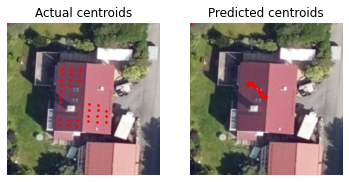

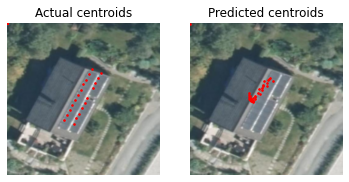

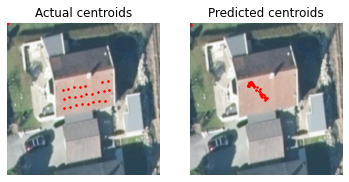

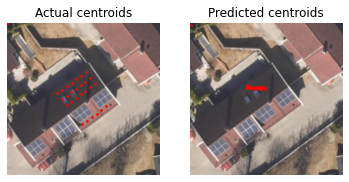

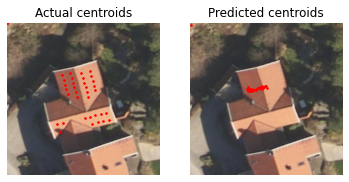

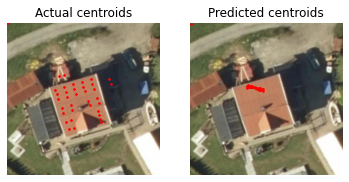

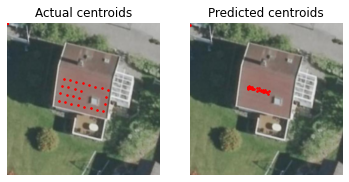

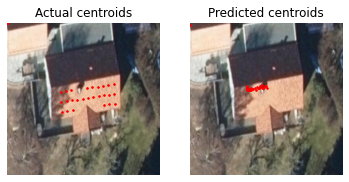

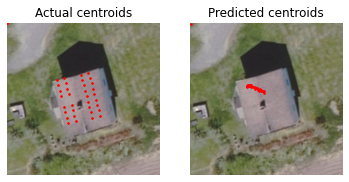

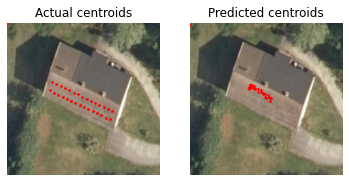

[tensor([[[126.9095, 123.5761],
          [124.0697, 126.8566],
          [123.2200, 124.0296],
          [122.5120, 122.8834],
          [122.1418, 119.4822],
          [118.6943, 121.9950],
          [120.2631, 117.2387],
          [116.8830, 119.5360],
          [116.8569, 116.2286],
          [115.1952, 115.4371],
          [112.8322, 113.5809],
          [110.2324, 115.2855],
          [111.1027, 109.2766],
          [106.6888, 111.3372],
          [106.8609, 106.8546],
          [104.9788, 106.3414],
          [104.2986, 103.4026],
          [102.0262, 105.0553],
          [102.2503, 101.6367],
          [ 99.8512, 103.0104],
          [101.2823, 101.4057],
          [ 99.5602, 101.5840],
          [101.6340, 100.0909],
          [ 99.2442, 101.4060],
          [101.3398,  99.1643],
          [ 99.8055, 100.5945],
          [ 99.9101,  99.4939],
          [ 99.8802,  98.8747],
          [102.3874,  98.2306],
          [101.1344,  98.8477],
          [103.2141,  96.3942],
        

In [22]:
test_model(model, test_loader, 10)

## Loss plot

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
val_los = pd.read_csv('val_loss_1.csv')
train_los = pd.read_csv('train_loss_1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'val_loss_1.csv'

<AxesSubplot:>

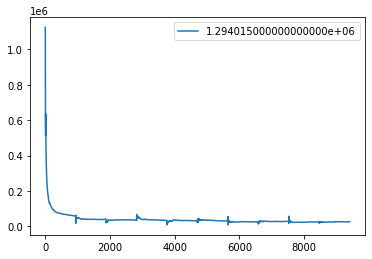

In [ ]:
train_los.plot()
plt.title('Train Loss')

Text(0.5, 1.0, 'Validation Loss')

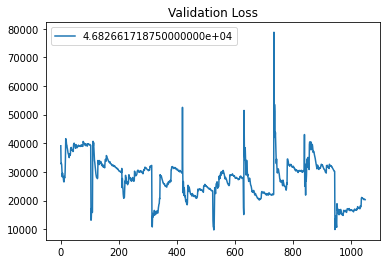

In [ ]:
val_los.plot()
plt.title('Validation Loss')